# Cirque potential 

\begin{equation}
    V(x, y) = -C_6 \left[ \dfrac{1}{\left(\beta\left[\left(x - x_e\right)^2 + y^2\right] + \alpha\right)^3} + \dfrac{1}{\left(\beta\left[\left(x + x_e\right)^2 + y^2\right] + \alpha\right)^3} \right]
\end{equation}

In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Take the slice of the potential, $y = 0$ 

In [169]:
# Potential parameters
c_6 = 1/2
alpha = 1
beta = 1/8
x_e = 5
PARAMETERS = [c_6, alpha, beta, x_e]

In [179]:
def V(x, y, PARAMETERS):
    c_6, alpha, beta, x_e = PARAMETERS
    return - c_6/(beta*( (x - x_e)**2 + y**2) + alpha )**3

In [171]:
PARAMETERS_right = [c_6, alpha, beta, x_e]
PARAMETERS_left = [c_6, alpha, beta, -x_e]

# Plot Potential slice $y = 0$

In [189]:
x = numpy.linspace(-15,15,100) # Points along X-axis
y = numpy.zeros(100)
V_double = V(x, y, PARAMETERS_left) + V(x, y, PARAMETERS_right)

<IPython.core.display.Javascript object>


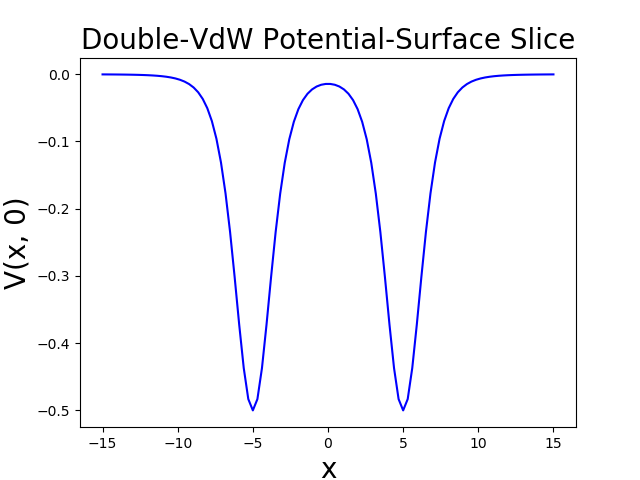

In [190]:
fig,ax = plt.subplots(1,1)

ax.plot(x, V_double,c='blue')

# Customise plot
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('V(x, 0)', fontsize=20)
ax.set_title("Double-VdW Potential-Surface Slice", fontsize=20)

plt.show()

# Potential Surface in 3D

<IPython.core.display.Javascript object>


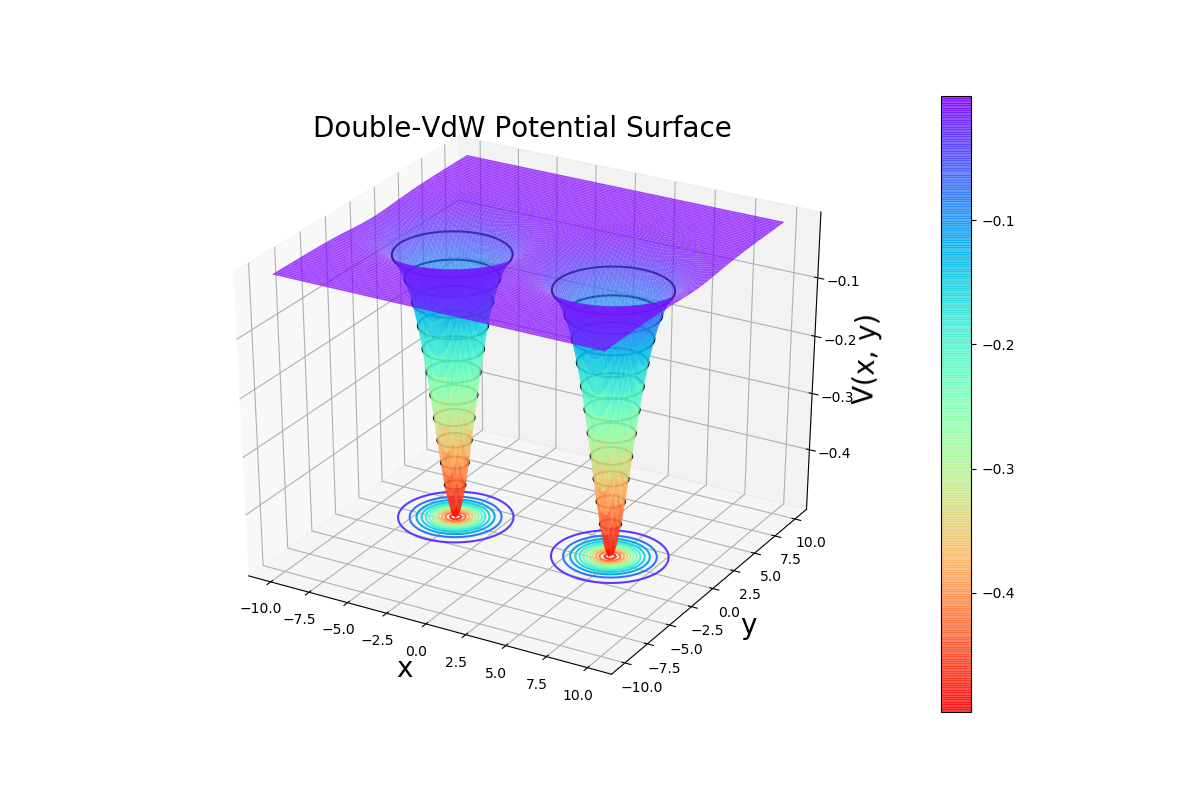

In [188]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8), dpi=100)
ax = fig.add_subplot(111, projection="3d")

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

V_double =  V(X, Y, PARAMETERS_right) + V(X, Y, PARAMETERS_left)
Z = V_double

cmap = 'rainbow_r' # Colormap
n_clines = 15
# Plot potential energy surface 
surf = ax.plot_surface(X, Y, Z, cmap=cmap, rstride = 1, cstride = 1, linewidth = 0, alpha=0.75)

# Plot contour of surface projection on XY plane
ax.contour(X, Y, Z, n_clines, zdir='z', offset=Z.min(), cmap=cmap)

# Plot contour lines placed on surface 
ax.contour(X, Y, Z, n_clines, colors="black", linestyles="solid", linewidths=1.5, alpha=1)

fig.colorbar(surf) # Add colorbar to surface object

# Customise plot appearance
ax.set_title("Double-VdW Potential Surface", fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('V(x, y)', fontsize=20)

plt.show()